## Doris Fang

In [1]:
#Package:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
from IPython.display import display
from scipy import stats
from scipy.stats import f_oneway, ttest_ind
from sklearn.linear_model import LinearRegression
import os

In [2]:
#Read the Excel file
data = pd.read_excel('./RXMG_Assessment_Data.xlsx')

## Data Explore:

**Data Dictionary:**
* Offer ID-Numeric ID to mark each Offer as unique
* Data ID-Numeric ID to mark each Audience as unique
* Date-Date the Email was sent out
* Drop Number-Drop Order the drop were sent out that day
* Delivered-Number of recorders delivered
* Clicks-Number of Clicks
* CTR-Ratio of Clicks to Delivered
* Revenue-Amount of Money Earned per Drop
* eCPM-Amount of Money Earned per 1000 Delivered
* Offer Type-Offer category the consumer would associate the offer with
* Audience Type-The category of user within the Audience

#### checking the basic information of dataset:


In [3]:
#Read ad check how's the data looks like:
print(data.columns)
display(data.head()) #default set is top5 rows

Index(['Offer ID', 'Data ID', 'Date', 'Drop Number', 'Delivered', 'Clicks',
       'CTR', 'Revenue', 'eCPM', 'Offer Type', 'Audience Type'],
      dtype='object')


,Offer ID,Data ID,Date,Drop Number,Delivered,Clicks,CTR,Revenue,eCPM,Offer Type,Audience Type
0,773,75,2022-11-01,2,124248,1137,0.009151,530.0,4.265662,Credit Card,Credit Card
1,882,75,2022-11-01,3,124046,46,0.000371,375.0,3.023072,Home Security,Credit Card
2,408,14,2022-11-01,2,176291,165,0.000936,630.0,3.573637,Education,Housing
3,185,14,2022-11-01,3,176417,168,0.000952,1800.0,10.203098,Home Security,Housing
4,587,14,2022-11-01,4,176463,674,0.003819,444.0,2.516108,Shopping,Housing


In [4]:
print('The length of data is {},'.format(data.shape[0]),'the number of columns is {}.'.format(data.shape[1]))

The length of data is 1423, the number of columns is 11.


In [5]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Offer ID       1423 non-null   int64         
 1   Data ID        1423 non-null   int64         
 2   Date           1423 non-null   datetime64[ns]
 3   Drop Number    1423 non-null   int64         
 4   Delivered      1423 non-null   int64         
 5   Clicks         1423 non-null   int64         
 6   CTR            1423 non-null   float64       
 7   Revenue        1423 non-null   float64       
 8   eCPM           1390 non-null   float64       
 9   Offer Type     1423 non-null   object        
 10  Audience Type  1423 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 122.4+ KB
None


,Offer ID,Data ID,Drop Number,Delivered,Clicks,CTR,Revenue,eCPM
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1390.000000
mean,504.203092,49.178496,3.132115,150417.503162,426.408995,0.002906,663.246697,4.760399
std,263.975002,22.902881,0.953623,34220.035645,460.321003,0.003077,529.440728,3.946752
min,102.000000,14.000000,2.000000,2860.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,14.000000,2.000000,127230.500000,148.000000,0.000940,300.000000,2.094113
50%,517.000000,63.000000,3.000000,160890.000000,258.000000,0.001848,540.000000,3.561411
75%,699.000000,63.000000,4.000000,170222.000000,522.000000,0.003802,900.000000,6.423398
max,998.000000,75.000000,7.000000,375796.000000,3911.000000,0.027044,5280.000000,36.800323


In [6]:
#eCPM's count is different to 1423
#Check Nan Value
missing_values = data.isna().sum()
print("Columns with missing values: \n",missing_values[missing_values > 0])

Columns with missing values: 
 eCPM    33
dtype: int64


In [7]:
print('Based on eCPMs equation is Revenue/(Delivered/1000)，I would like to check is there exist data that revenue equal to 0 and at the same time eCPM is 0.\n')
check_nan = data[(data['Revenue'] == 0) & (data['eCPM'].isna())]

print("Number of rows where Revenue equal to 0 and eCPM are equal to Nan:", check_nan.shape[0])

Based on eCPMs equation is Revenue/(Delivered/1000)，I would like to check is there exist data that revenue equal to 0 and at the same time eCPM is 0.

Number of rows where Revenue equal to 0 and eCPM are equal to Nan: 33


In [8]:
#Going to change those Nan to 0 values:
data['eCPM'] = data['eCPM'].fillna(0)
#Check again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Offer ID       1423 non-null   int64         
 1   Data ID        1423 non-null   int64         
 2   Date           1423 non-null   datetime64[ns]
 3   Drop Number    1423 non-null   int64         
 4   Delivered      1423 non-null   int64         
 5   Clicks         1423 non-null   int64         
 6   CTR            1423 non-null   float64       
 7   Revenue        1423 non-null   float64       
 8   eCPM           1423 non-null   float64       
 9   Offer Type     1423 non-null   object        
 10  Audience Type  1423 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 122.4+ KB


In [9]:
int64_columns = data.select_dtypes(include=['int64'])

#Loop through each int64 column and print unique values and their counts
for column in int64_columns:
    unique_values = data[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")
    print()

Column: Offer ID
112    54
961    49
670    44
685    43
102    40
       ..
688     1
410     1
236     1
864     1
633     1
Name: Offer ID, Length: 203, dtype: int64
Number of unique values: 203

Column: Data ID
63    521
14    364
75    279
43    259
Name: Data ID, dtype: int64
Number of unique values: 4

Column: Drop Number
2    449
3    447
4    422
5    101
6      3
7      1
Name: Drop Number, dtype: int64
Number of unique values: 6

Column: Delivered
162771    2
166106    2
104251    2
163256    2
187480    2
         ..
133800    1
188094    1
127653    1
162468    1
204799    1
Name: Delivered, Length: 1401, dtype: int64
Number of unique values: 1401

Column: Clicks
164     10
145      9
199      8
132      8
165      8
        ..
2557     1
74       1
505      1
504      1
2021     1
Name: Clicks, Length: 700, dtype: int64
Number of unique values: 700



**The Offer IDs exhibit a wide range of occurrences, with the most frequent (Offer ID $112$) appearing $54$ times and the least frequent occurring only once. Similarly, the Data IDs vary significantly, with Data ID $63$ being the most common ($521$ occurrences) and Data ID $43$ the least common ($259$ occurrences). These disparities in frequency across both Offer and Data IDs may introduce bias and influence the analysis.**

In [10]:
#Check CTR:
#Calculate CTR based on Clicks and Delivered
cal_ctr = data['Clicks'] / data['Delivered']

#Check if there are any discrepancies between calculated CTR and 'CTR' column
errors_exist = (cal_ctr != data['CTR']).any()

#Convert the 'CTR' column to the same precision as the calculated CTR
data['CTR_rounded'] = data['CTR'].round(10)

#Find rows where there are discrepancies between the rounded calculated CTR and 'CTR' column
mismatch_ctr_rows = data[cal_ctr.round(10) != data['CTR_rounded']]

if mismatch_ctr_rows.empty:
    print("No errors found in the CTR calculation.")
else:
    print("Errors exist in the CTR calculation.")


No errors found in the CTR calculation.


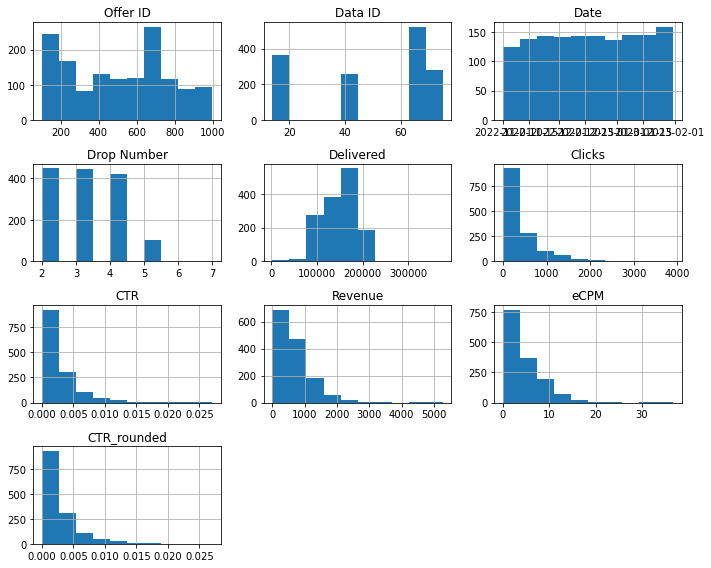

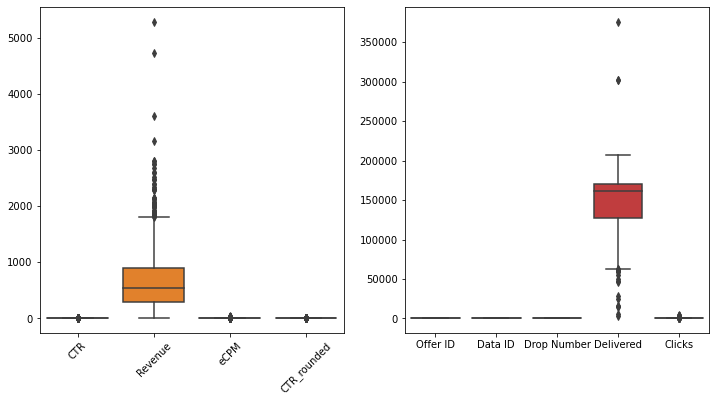

Skewness:
 Offer ID       0.009989
Data ID       -0.570281
Drop Number    0.333085
Delivered     -0.125817
Clicks         2.560610
CTR            2.687150
Revenue        1.970053
eCPM           2.153473
CTR_rounded    2.687150
dtype: float64


In [11]:
#Calculate skewness for numerical columns
skewness = data.skew()

#Visualize distributions using histograms
data.hist(figsize = (10, 8))
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
float64_cols = data.select_dtypes(include=['float64'])
int64_cols = data.select_dtypes(include=['int64'])
sns.boxplot(data = float64_cols)
plt.xticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.boxplot(data = int64_cols)
plt.show()
print("Skewness:\n", skewness)

In [12]:
filters_dt = data[(data['Delivered'] > 300000) | (data['Delivered'] < 20000)]
filters_dt

,Offer ID,Data ID,Date,Drop Number,Delivered,Clicks,CTR,Revenue,eCPM,Offer Type,Audience Type,CTR_rounded
159,773,63,2022-11-13,3,301672,1030,0.003414,924.00,3.062929,Home Financing,Mortgage,0.003414
160,126,63,2022-11-13,4,301916,788,0.002610,1200.00,3.974615,Injury Claim,Mortgage,0.002610
641,773,63,2022-12-13,3,375796,829,0.002206,384.00,1.021831,Home Financing,Mortgage,0.002206
954,680,75,2023-01-02,3,2860,4,0.001399,0.00,0.000000,Employment,Credit Card,0.001399
1088,446,14,2023-01-11,4,5584,42,0.007521,96.00,17.191977,Credit Card,Housing,0.007521
1089,161,14,2023-01-11,3,15440,37,0.002396,518.00,33.549223,Life Insurance,Housing,0.002396
1282,290,14,2023-01-23,5,15178,32,0.002108,472.00,31.097641,Tax Debt,Housing,0.002108
1412,675,14,2023-01-31,5,15043,73,0.004853,240.95,16.017417,Home Financing,Housing,0.004853


* **From the skewness, easy to see Clicks, CTR, Revenue, eCPM, CTR_rounded, all these variables have positive skewness values, indicating right-skewed distributions. This means there are more lower values and fewer higher values, with a longer right tail in their distributions.**
* **The data printouts above indicate the presence of some obvious outliers from Boxplot. It's uncertain whether these outliers result from errors in data entry.**

In [13]:
#Saved for Later analysis, just in case.
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

#To detect outliers:
outliers = data.select_dtypes(include = 'number').apply(detect_outliers_iqr)

#Filter the dataset to only include rows with outlier values
outlier_data = data[outliers.any(axis = 1)]
without_outlier = data.drop(outlier_data.index)

In [14]:
#Based on the data dictonary, I am going to calculate and create a new column
#Since Revenue is the amount of Money Earned per Drop:
data['Total Revenue'] = data['Revenue'] * data['Drop Number']

#eCPM is the amount of Money Earned per 1000 Delivered, and the Money Earned means Revenue
data['Last eCPM'] = (data['Total Revenue'] / data['Delivered']) * 1000

## Assessment Task:

### 1. What is the Best Offer ID? By which Metric is the Offer ID the “best”? Does it vary by Data ID?

In [15]:
#convert the 'Date' column into datetime format with a 'Month' period
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')

#Group the data by 'Month', 'Data ID' and 'Offer ID', and aggregate the columns
grouped_data = data.groupby(['Month','Data ID','Offer ID']).agg({
    'Clicks': 'sum', #Sum of Clicks
    'CTR' : 'mean', #Mean of CTR
    'Total Revenue': 'sum', #Sum of Total Revenue
    'Last eCPM': 'sum' #Sum of eCPM
}).reset_index() #Reset the index to make it a DataFrame

print(grouped_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   Month          631 non-null    period[M]
 1   Data ID        631 non-null    int64    
 2   Offer ID       631 non-null    int64    
 3   Clicks         631 non-null    int64    
 4   CTR            631 non-null    float64  
 5   Total Revenue  631 non-null    float64  
 6   Last eCPM      631 non-null    float64  
dtypes: float64(3), int64(3), period[M](1)
memory usage: 34.6 KB
None


In [16]:
#class distributions:
class_counts_month = grouped_data.groupby('Month').size()
class_counts_type = grouped_data.groupby('Data ID').size()
print( 'Months Distribution:',class_counts_month, 'Audience Type Distribution:',class_counts_type)

Months Distribution: Month
2022-11    206
2022-12    221
2023-01    204
Freq: M, dtype: int64 Audience Type Distribution: Data ID
14    171
43    149
63    150
75    161
dtype: int64


In [17]:
#Group the data by Month', 'Offer ID', 'Data ID', and calculate the total revenue for each group
audience_month_offer_revenue = grouped_data.groupby(['Month', 'Offer ID'])['Total Revenue'].sum().reset_index()
best_offer_ids = audience_month_offer_revenue.loc[audience_month_offer_revenue.groupby(['Month','Offer ID'])['Total Revenue'].idxmax()]
#Print data:
best_offer_ids = best_offer_ids.sort_values(by = ['Month', 'Total Revenue'], ascending = [True, False])
print((best_offer_ids[best_offer_ids['Month'] == '2022-11']).head())
print((best_offer_ids[best_offer_ids['Month'] == '2022-12']).head())
print((best_offer_ids[best_offer_ids['Month'] == '2023-01']).head())

       Month  Offer ID  Total Revenue
82   2022-11       685        54892.0
117  2022-11       961        46587.0
53   2022-11       444        35880.0
78   2022-11       670        34961.1
28   2022-11       231        32305.0
       Month  Offer ID  Total Revenue
214  2022-12       685       61319.20
211  2022-12       670       47979.25
150  2022-12       228       38585.00
181  2022-12       444       38574.00
123  2022-12       102       33008.00
       Month  Offer ID  Total Revenue
373  2023-01       961        50753.0
267  2023-01       192        47250.0
253  2023-01       102        46768.0
341  2023-01       670        41264.5
343  2023-01       680        34944.0


In [18]:
#Group the data by 'Offer ID' and 'Data ID', and calculate the total revenue for each group
best_ids = grouped_data.groupby(['Offer ID'])['Total Revenue'].sum().reset_index()

#Find the offer ID with the highest total revenue:
print(best_ids.sort_values(by = 'Total Revenue', ascending = False).head(10))

     Offer ID  Total Revenue
194       961      128932.20
133       670      124204.85
137       685      116211.20
0         102      110492.00
88        444      105994.00
135       680       79790.00
89        446       72996.00
37        228       70095.00
2         112       64557.62
156       766       62178.00


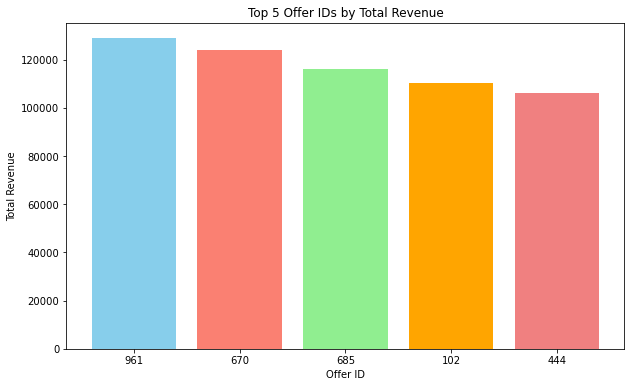

In [19]:
top_5 = best_ids.sort_values(by = 'Total Revenue', ascending = False).head(5)

#Plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']
plt.figure(figsize = (10, 6))
plt.bar(range(len(top_5)), top_5['Total Revenue'], color = colors)
plt.xlabel('Offer ID')
plt.ylabel('Total Revenue')
plt.title('Top 5 Offer IDs by Total Revenue')
plt.xticks(range(len(top_5)), top_5['Offer ID'])  # Set the tick labels to offer IDs
plt.show()

****
* In November 2022, the top offer ID was 685, with a total revenue of 54892.0. 
* In December 2022, the top offer ID was 685, generating a total revenue of 61319.20. 
* In January 2023, the top offer ID once again was 961, with a total revenue of 50753.0.
* After grouping by Data ID and Offer ID, the total revenue for each group was summed. The group with the highest total revenue was then selected. Both a plot and a table were generated to illustrate these results, both of which indicate that Offer ID $961$ is the best-performing Offer ID.

**Until here, I would like to say the best Offer ID is $961$ because it generated the highest total revenue.**
****
**Starting here, I aim to determine is there exist the Offer ID vary by Data ID based on the same metric.**

* To achieve this, I will conduct an ANOVA test to examine significant differences in total revenue among different Data IDs. The null hypothesis posits that there are no variations in total revenue across Data IDs.

In [20]:
f_statistic, p_value = stats.f_oneway(grouped_data['Total Revenue'][grouped_data['Data ID'] == 75],
                                      grouped_data['Total Revenue'][grouped_data['Data ID'] == 14],
                                      grouped_data['Total Revenue'][grouped_data['Data ID'] == 43],
                                      grouped_data['Total Revenue'][grouped_data['Data ID'] == 63])
print('ANOVA F-statistic:', f_statistic)
print('ANOVA p-value:', p_value)

ANOVA F-statistic: 12.225586227000985
ANOVA p-value: 8.783019034976481e-08


**Before grouping, the ANOVA test yielded an F-statistic of about 12.23 and a p-value close to 8.78e-08. With such a low p-value, we reject the null hypothesis, indicating a significant difference in total revenue among Data IDs.**

In [21]:
#Group by Data ID and Offer ID and calculate total revenue
grouped = grouped_data.groupby(['Data ID', 'Offer ID'])['Total Revenue'].sum().reset_index()

offerid_dt = []
#Iterate over unique data IDs
for data_id in grouped['Data ID'].unique():
    # Get total revenue for each offer ID within the current data ID group
    by_offer_id = grouped[grouped['Data ID'] == data_id]['Total Revenue']
    # Append the total revenue values to the offer_id_data list
    offerid_dt.append(by_offer_id)

# Perform ANOVA test
f_statistic, p_value = f_oneway(*offerid_dt)

# Print ANOVA test results
print('This is the grouped dataset:, ')
print('ANOVA F-statistic:', f_statistic)
print('ANOVA p-value:', p_value,'\n')

# Perform T-test for each Data ID
for data_id, group_data in grouped.groupby('Data ID'):
    data_id_revenue = group_data['Total Revenue']
    other_revenue = grouped.loc[grouped['Data ID'] != data_id, 'Total Revenue']
    t_statistic, p_value = ttest_ind(data_id_revenue, other_revenue)
    print(f'T-test for Data ID {data_id}: t-statistic = {t_statistic}, p-value = {p_value}')


This is the grouped dataset:, 
ANOVA F-statistic: 4.952854487188801
ANOVA p-value: 0.002198087797249544 

T-test for Data ID 14: t-statistic = -1.3383966306903705, p-value = 0.1815632262687266
T-test for Data ID 43: t-statistic = 1.6048119137169345, p-value = 0.10936157398036005
T-test for Data ID 63: t-statistic = 2.71186243528686, p-value = 0.006992908299322309
T-test for Data ID 75: t-statistic = -2.7901180134840495, p-value = 0.005533003454493509


****
**Based on the ANOVA test and t-tests conducted for each Data ID:**

* The ANOVA test yielded an F-statistic of approximately 4.95 and a p-value of approximately 0.0022. This indicates that there is a statistically significant difference ignificant differences in total revenue among different offer IDs within each data ID group. 
* For Data ID 14, the total revenue does not significantly differ from zero, with a t-statistic of approximately -1.34 and a p-value of approximately 0.182.
* For Data ID 43, although the t-statistic is approximately 1.60, suggesting a potential difference in total revenue, the p-value is approximately 0.109, indicating that this difference is not statistically significant.
* For Data ID 63, both the t-statistic (approximately 2.71) and the p-value (approximately 0.007) suggest a statistically significant difference in total revenue.
* For Data ID 75, similar to Data ID 63, the t-statistic (approximately -2.79) and the p-value (approximately 0.006) indicate a statistically significant difference in total revenue.

**Overall, these results suggest that the total revenue varies significantly among different Data IDs, particularly for Data IDs 63 and 75, while there is no significant difference for Data IDs 14 and 43.**
****
**Thus, Let's go to explore what is the best offer ID in different Data ID by total revenue**

In [22]:
# Filter the data for the Data ID is 75
credit_card_data = grouped[grouped['Data ID'] == 75]

#Group the filtered data by 'Offer ID' and 'Data ID', and calculate the sum of total revenue for each group
total_revenue_credit_card = credit_card_data.groupby(['Offer ID','Data ID'])['Total Revenue'].sum().reset_index()

#Sort the results by total revenue in descending order
sorted_total_revenue_credit_card = total_revenue_credit_card.sort_values(by = 'Total Revenue', ascending = False)

#Display the sorted results
print(sorted_total_revenue_credit_card.head())

    Offer ID  Data ID  Total Revenue
66       670       75        46885.8
67       680       75        24590.0
46       446       75        24472.0
0        102       75        22816.0
98       961       75        21552.0


In [23]:
#Filter the data for Data ID is 14
housing_data = grouped[grouped['Data ID'] == 14]

#Group and sum the total revenue by 'Offer ID' and 'Data ID'
total_revenue_housing = housing_data.groupby(['Offer ID', 'Data ID'])['Total Revenue'].sum().reset_index()

#Sort the results by total revenue in descending order
sorted_total_revenue_housing = total_revenue_housing.sort_values(by = 'Total Revenue', ascending = False)
#Display the top 5 results
print(sorted_total_revenue_housing.head())

    Offer ID  Data ID  Total Revenue
2        112       14       50654.62
46       446       14       33856.00
97       961       14       33048.00
73       680       14       28216.00
64       625       14       26733.00


In [24]:
#Filter the data for the Data ID is 43
lending_data = grouped[grouped['Data ID'] == 43]

#Group and sum the total revenue by 'Offer ID' and 'Data ID'
total_revenue_lending = lending_data.groupby(['Offer ID', 'Data ID'])['Total Revenue'].sum().reset_index()

#Sort the results by total revenue in descending order
sorted_total_revenue_lending = total_revenue_lending.sort_values(by = 'Total Revenue', ascending = False)
#Display the top 5 results
print(sorted_total_revenue_lending.head())

    Offer ID  Data ID  Total Revenue
60       670       43       69720.45
0        102       43       59248.00
62       685       43       44415.00
85       961       43       37620.00
71       766       43       32044.00


In [25]:
#Filter the data for the Data ID is 63
mortgage_data = grouped[grouped['Data ID'] == 63]
#Group and sum the total revenue by 'Offer ID' and 'Data ID'
total_revenue_mortgage = mortgage_data.groupby(['Offer ID', 'Data ID'])['Total Revenue'].sum().reset_index()

#Sort the results by total revenue in descending order
sorted_total_revenue_mortgage = total_revenue_mortgage.sort_values(by = 'Total Revenue', ascending = False)
#Display the top 5 results
print(sorted_total_revenue_mortgage.head())

    Offer ID  Data ID  Total Revenue
39       444       63        89450.0
18       228       63        66770.0
88       961       63        36712.2
42       461       63        35508.0
61       685       63        29473.2


In [26]:
top1 = grouped.loc[grouped.groupby(['Data ID'])['Total Revenue'].idxmax()]
top1

,Data ID,Offer ID,Total Revenue
2,14,112,50654.62
164,43,670,69720.45
229,63,444,89450.00
348,75,670,46885.80


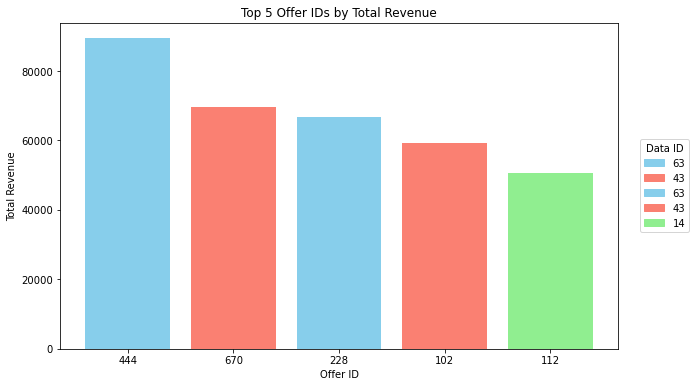

In [27]:
#grouped = grouped_data.groupby(['Data ID', 'Offer ID'])['Total Revenue'].sum().reset_index()
top_5 = grouped.sort_values(by = 'Total Revenue', ascending = False).head(5)
colors = {63: 'skyblue', 43: 'salmon', 14: 'lightgreen', 75: 'orange', 33: 'lightcoral'}

#Plot
plt.figure(figsize = (10, 6))
bars = plt.bar(range(len(top_5)), top_5['Total Revenue'], color = [colors[data_id] for data_id in top_5['Data ID']])

plt.xlabel('Offer ID')
plt.ylabel('Total Revenue')
plt.title('Top 5 Offer IDs by Total Revenue')
plt.xticks(range(len(top_5)), top_5['Offer ID'])
handles = [plt.Rectangle((0,0),1,1, color = colors[data_id]) for data_id in top_5['Data ID']]
plt.legend(handles, top_5['Data ID'], title = 'Data ID', bbox_to_anchor = (1.04,0.5), loc = 'center left', borderaxespad = 0)

plt.show()

****
* In Data ID 75, Offer ID 670 has the highest revenue: 46885.8.
* For Data ID 14, Offer ID 112 has the highest revenue: 50654.62.
* In Data ID 43, Offer ID 670 has the highest revenue: 69720.45.
* In Data ID 63, Offer ID 444 has the highest revenue: 89450.0.
* In the plot, the highest total revenue is achieved by Offer ID 444 for Data ID 63, while Offer ID 670 generates the second-highest revenue for Data ID 43.

**Offer ID 444 is identified as the best offer ID, based on the metric of total revenue generated by different Offer IDs for various Data IDs** 
****
### 2: What is the relationship between revenue and clicks? Does it vary by Data ID? How does this impact offer selection?

The correlation between Clicks and Revenue in all Data ID is Moderate


Text(0, 0.5, 'Revenue')

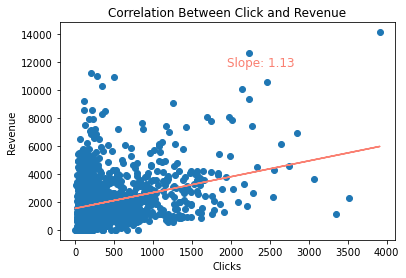

In [28]:
X = data['Clicks']
y = data['Total Revenue']

# Determine the strength of the correlation
correlation_coefficient = np.corrcoef(X, y)[0, 1]
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = 'Strong'
elif abs(correlation_coefficient) >= 0.3:
    correlation_strength = 'Moderate'
else:
    correlation_strength = 'Weak'
print('The correlation between Clicks and Revenue in all Data ID is',correlation_strength)

plt.title('Correlation Between Click and Revenue')

plt.scatter(X,y)
slope, intercept = np.polyfit(X, y, 1)
correlation_equation = slope * X + intercept
plt.plot(X, correlation_equation, color = 'salmon')
plt.text(0.5, 0.8, f'Slope: {slope:.2f}', transform = plt.gca().transAxes, fontsize = 12, color = 'salmon')
plt.xlabel('Clicks')
plt.ylabel('Revenue')

The correlation between Clicks and Revenue in Data ID 75 is Moderate


Text(0, 0.5, 'Revenue')

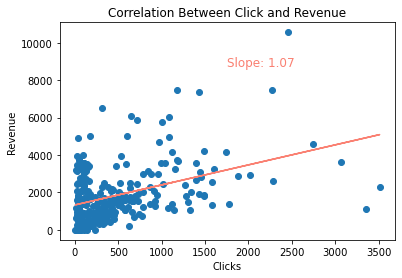

In [29]:
dt_75 = data[data['Data ID'] == 75]
X = dt_75['Clicks']
y = dt_75['Total Revenue']

# Determine the strength of the correlation
correlation_coefficient = np.corrcoef(X, y)[0, 1]
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = 'Strong'
elif abs(correlation_coefficient) >= 0.3:
    correlation_strength = 'Moderate'
else:
    correlation_strength = 'Weak'
print('The correlation between Clicks and Revenue in Data ID 75 is',correlation_strength)

plt.title('Correlation Between Click and Revenue')

plt.scatter(X,y)
slope, intercept = np.polyfit(X, y, 1)
correlation_equation = slope * X + intercept
plt.plot(X, correlation_equation, color = 'salmon')
plt.text(0.5, 0.8, f'Slope: {slope:.2f}', transform = plt.gca().transAxes, fontsize = 12, color = 'salmon')

plt.xlabel('Clicks')
plt.ylabel('Revenue')

The correlation between Clicks and Revenue in Data ID 14 is Weak


Text(0, 0.5, 'Revenue')

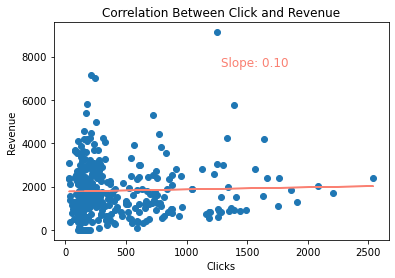

In [30]:
dt_14 = data[data['Data ID'] == 14]
X = dt_14['Clicks']
y = dt_14['Total Revenue']
plt.title('Correlation Between Click and Revenue')

# Determine the strength of the correlation
correlation_coefficient = np.corrcoef(X, y)[0, 1]
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = 'Strong'
elif abs(correlation_coefficient) >= 0.3:
    correlation_strength = 'Moderate'
else:
    correlation_strength = 'Weak'
print('The correlation between Clicks and Revenue in Data ID 14 is',correlation_strength)

plt.scatter(X,y)
slope, intercept = np.polyfit(X, y, 1)
correlation_equation = slope * X + intercept
plt.plot(X, correlation_equation, color = 'salmon')
plt.text(0.5, 0.8, f'Slope: {slope:.2f}', transform = plt.gca().transAxes, fontsize = 12, color = 'salmon')
plt.xlabel('Clicks')
plt.ylabel('Revenue')

The correlation between Clicks and Revenue in Data ID 43 is Moderate


Text(0, 0.5, 'Revenue')

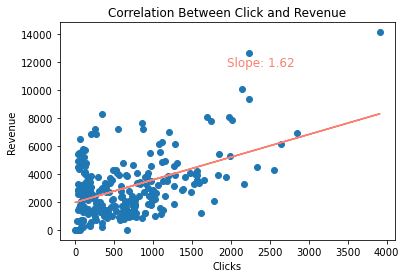

In [31]:
dt_43 = data[data['Data ID'] == 43]
X = dt_43['Clicks']
y = dt_43['Total Revenue']
plt.title('Correlation Between Click and Revenue')

# Determine the strength of the correlation
correlation_coefficient = np.corrcoef(X, y)[0, 1]
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = 'Strong'
elif abs(correlation_coefficient) >= 0.3:
    correlation_strength = 'Moderate'
else:
    correlation_strength = 'Weak'
print('The correlation between Clicks and Revenue in Data ID 43 is',correlation_strength)

plt.scatter(X,y)
slope, intercept = np.polyfit(X, y, 1)
correlation_equation = slope * X + intercept
plt.plot(X, correlation_equation, color = 'salmon')
plt.text(0.5, 0.8, f"Slope: {slope:.2f}", transform = plt.gca().transAxes, fontsize = 12, color = 'salmon')
plt.xlabel('Clicks')
plt.ylabel('Revenue')

The correlation between Clicks and Revenue in Data ID 63 is Weak


Text(0, 0.5, 'Revenue')

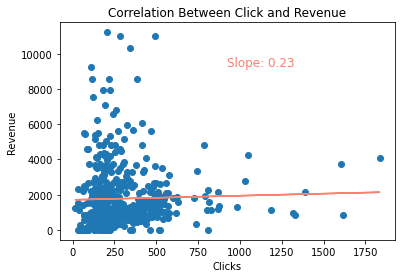

In [32]:
dt_63 = data[data['Data ID'] == 63]
X = dt_63['Clicks']
y = dt_63['Total Revenue']
# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(X, y)[0, 1]
# Determine the strength of the correlation
if abs(correlation_coefficient) >= 0.7:
    correlation_strength = 'Strong'
elif abs(correlation_coefficient) >= 0.3:
    correlation_strength = 'Moderate'
else:
    correlation_strength = 'Weak'
print('The correlation between Clicks and Revenue in Data ID 63 is',correlation_strength)

plt.title('Correlation Between Click and Revenue')

plt.scatter(X,y)
slope, intercept = np.polyfit(X, y, 1)
correlation_equation = slope * X + intercept
plt.plot(X, correlation_equation, color = 'salmon')
plt.text(0.5, 0.8, f'Slope: {slope:.2f}', transform = plt.gca().transAxes, fontsize = 12, color = 'salmon')
plt.xlabel('Clicks')
plt.ylabel('Revenue')

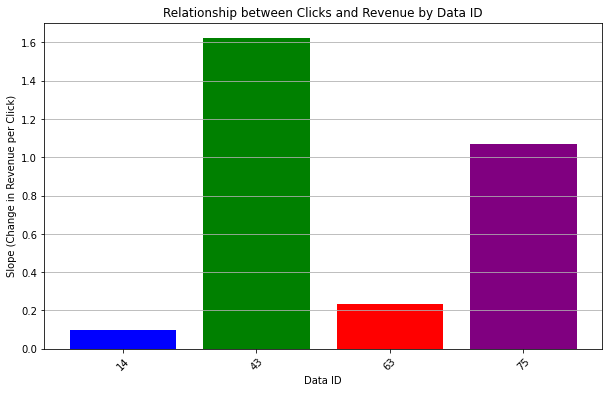

In [33]:
grouped_data = data.groupby('Data ID')

# Initialize lists to store slopes and intercepts
slopes = []
intercepts = []
data_ids = []
# Fit linear regression model for each Data ID
for data_id, group in grouped_data:
    X = group['Clicks'].values.reshape(-1, 1)  # Independent variable: Clicks
    y = group['Total Revenue'].values  # Dependent variable: Total Revenue
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store slope and intercept
    slopes.append(model.coef_[0])
    intercepts.append(model.intercept_)
    data_ids.append(data_id)
    
colors = ['blue', 'green', 'red', 'purple']
# Visualize slopes
plt.figure(figsize = (10, 6))
plt.bar(range(len(data_ids)), slopes, color = colors)
plt.xlabel('Data ID')
plt.ylabel('Slope (Change in Revenue per Click)')
plt.title('Relationship between Clicks and Revenue by Data ID')
plt.xticks(range(len(data_ids)),data_ids, rotation = 45)
plt.grid(axis = 'y')
plt.show()


****
* The overall dataset's slope represents the average relationship between clicks and revenue across all segments. For every additional click, revenue increases by 1.13 units on average.
* **Data ID 75:** This segment has a slope slightly lower than the overall dataset's slope, indicating a moderately strong positive relationship between clicks and revenue. For every additional click, revenue increases by 1.07 units on average.
* **Data ID 14:** This segment has a relatively low slope, suggesting a weak relationship between clicks and revenue compared to the overall dataset. For every additional click, revenue only increases by 0.10 units on average. This may indicate lower engagement or conversion rates.
* **Data ID 43:** This segment has the highest slope among the segments, indicating a strong positive relationship between clicks and revenue. For every additional click, revenue increases by 1.62 units on average. This segment may be highly responsive to marketing efforts or have a high conversion rate.
* **Data ID 63:** The relationship between clicks and revenue for this segment is relatively weak compared to the overall dataset. For every additional click, revenue increases by 0.23 units on average. This suggests that the impact of clicks on revenue is not as strong for this segment compared to others.

**There is a positive relationship between revenue and clicks, with an average increase of 1.13 units in revenue for every additional click. However, this relationship differs among Data IDs.**

**Moreover, based on our analysis, it appears that Data ID 43 demonstrates a stronger correlation between clicks and revenue compared to other segments. Given this insight, I would recommend considering Data ID 43 as a priority for our marketing strategies. By focusing our efforts on this segment, we can potentially maximize our returns on investment and drive higher revenue. .**

**Conversely, weaker correlations are evident in other segments, such as Data ID 14. These segments may necessitate different marketing strategies or adjustments to optimize their effectiveness.**
****
### 3: Which offer types generate the highest revenue in the different Audience Type? What are the most effective promotional tactics for different types of audience in our portfolio?

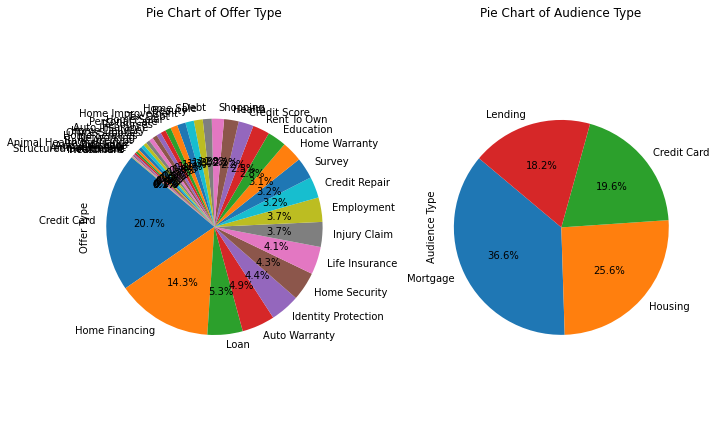

In [34]:
unique_col = ['Offer Type', 'Audience Type']

plt.figure(figsize = (10, 6 * len(unique_col)))
for i, col in enumerate(unique_col, start = 1):
    
    plt.subplot(len(unique_col), 2, i)    
    #Plot pie chart for the current column
    data[col].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle = 140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

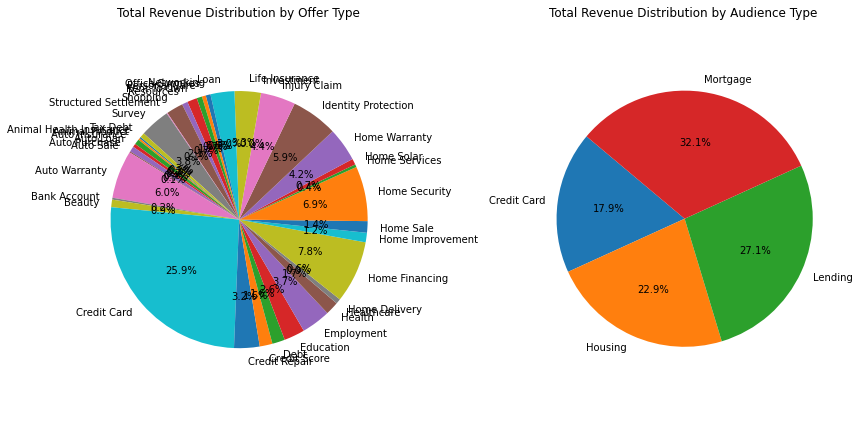

In [35]:
# Calculate total revenue for each offer type
offer_type_revenue = data.groupby('Offer Type')['Total Revenue'].sum()

# Calculate total revenue for each audience type
audience_type_revenue = data.groupby('Audience Type')['Total Revenue'].sum()

# Plot pie chart for offer type revenue
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.pie(offer_type_revenue, labels = offer_type_revenue.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Total Revenue Distribution by Offer Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot pie chart for audience type revenue
plt.subplot(1, 2, 2)
plt.pie(audience_type_revenue, labels=audience_type_revenue.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Total Revenue Distribution by Audience Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

In [36]:
# Assuming 'Total Revenue' is the revenue column and 'Offer Type' is the offer type column
mortage_highest = data[data['Audience Type'] == 'Mortgage'].groupby('Offer Type')['Total Revenue'].sum().nlargest(5)

print("Top 5 offer types with the highest total revenue for the audience type 'Mortgage':\n",
      mortage_highest)

lending_highest = data[data['Audience Type'] == 'Lending'].groupby('Offer Type')['Total Revenue'].sum().nlargest(5)
print("Top 5 offer types with the highest total revenue for the audience type 'Lending':\n",
      lending_highest)

housing_highest = data[data['Audience Type'] == 'Housing'].groupby('Offer Type')['Total Revenue'].sum().nlargest(5)
print("Top 5 offer types with the highest total revenue for the audience type 'Housing':\n",
      housing_highest)

credit_highest = data[data['Audience Type'] == 'Credit Card'].groupby('Offer Type')['Total Revenue'].sum().nlargest(5)
print("Top 5 offer types with the highest total revenue for the audience type 'Credit Card':\n",
      credit_highest)

Top 5 offer types with the highest total revenue for the audience type 'Mortgage':
 Offer Type
Home Financing         176052.0
Home Security          128020.0
Home Warranty          112710.0
Identity Protection     71492.0
Credit Card             55557.9
Name: Total Revenue, dtype: float64
Top 5 offer types with the highest total revenue for the audience type 'Lending':
 Offer Type
Credit Card            385829.3
Auto Warranty           57677.0
Injury Claim            51525.0
Survey                  36980.0
Identity Protection     35363.0
Name: Total Revenue, dtype: float64
Top 5 offer types with the highest total revenue for the audience type 'Housing':
 Offer Type
Credit Card            80590.01
Education              52255.00
Home Financing         49774.54
Identity Protection    43072.00
Rent To Own            35750.62
Name: Total Revenue, dtype: float64
Top 5 offer types with the highest total revenue for the audience type 'Credit Card':
 Offer Type
Credit Card      225419.55
Auto

****
**We found:**
* The pie chart on the right illustrates the distribution of offer types within this dataset. Credit card the largest portion at 20.7%, followed by Home Financing at 14.3%, Loan at 5.3%, and 4.9% Auto Warrantly.
* Upon calculating the total revenue for each offer type. Credit card remains the highest at 25.9%,Home Financing 7.8%, and then Home Security at 6.9%, and Auto Warranty at 6%.
* The pie chart on the right illustrates the distribution of audience types within this dataset. Mortgage comprises the largest portion at 36.6%, followed by housing at 25.6%, credit card at 19.6%, and lending at 18.2%.
* Upon calculating the total revenue for each audience type, the ranking changes. Mortgage remains the highest at 32.1%, followed by lending at 27.1%, housing at 22.9%, and credit card at 17.9%.
****
**I would like to recommend**

* For the Mortgage Audience Type, with mortgages being the highest revenue contributor,the top-performing offer types in terms of total revenue are Home Financing, Home Security, Home Warranty, Identity Protection, and Credit Card. Targeted marketing strategies should spotlight these offers to engage mortgage audiences effectively.
* Similarly, for Lending audience type, Credit Card offers generate the highest revenue, followed by Auto Warranty, Injury Claim, Survey, and Identity Protection. Therefore, focusing on Credit Card offers and enhancing offerings related to Auto Warranty and Injury Claim could be beneficial. 
* Housing audience type sees Credit Card, Education, Home Financing, Identity Protection, and Rent To Own as the top five revenue-generating offer types. Tailored campaigns should prioritize these offers to capitalize on revenue potential within the housing audience.
* Credit Card Audience Type: With credit cards contributing a significant portion of revenue,  implementing targeted marketing campaigns centered around Credit Card offers can be a strategic approach to maximize revenue.
* In addition, With Credit Card offers consistently driving revenue across various audience segments, focusing SMS campaigns on these promotions can yield significant results. Crafting tailored messages to align with audience preferences can optimize engagement and revenue outcomes.
****
Moreover, about the distribution of offer type, there are some advice I would like to tell.

In [37]:
unique_offer_types = data['Offer Type'].unique()
offer_type_counts = data['Offer Type'].value_counts()
print('Unique Offer Types:', unique_offer_types,'\n\n Offer Type Counts:\n', offer_type_counts)

Unique Offer Types: ['Credit Card' 'Home Security' 'Education' 'Shopping' 'Home Financing'
 'Home Improvement' 'Home Solar' 'Auto Insurance' 'Identity Protection'
 'Home Warranty' 'Credit Repair' 'Rent To Own' 'Health' 'Injury Claim'
 'Personal Care' 'Life Insurance' 'Credit Score' 'Loan' 'Survey'
 'Employment' 'Auto Warranty' 'Auto Purchase' 'Bank Account' 'Tax Debt'
 'Beauty' 'Healthcare' 'Structured Settlement' 'Home Delivery'
 'Office Supplies' 'Home Sale' 'Debt' 'Networking' 'Animal Product'
 'Auto Loan' 'Auto Sale' 'Investment' 'Resources'
 'Animal Health Insurance' 'Home Services'] 

 Offer Type Counts:
 Credit Card                295
Home Financing             204
Loan                        75
Auto Warranty               70
Identity Protection         63
Home Security               61
Life Insurance              59
Injury Claim                53
Employment                  52
Credit Repair               45
Survey                      45
Home Warranty               44
Education

****
**Based on the Offer Type Counts above, there are some types only have 1 count, thus, I would like to make some advices:**
1. **Merge Similar Offer Types**: 
    - **Bank Account**: 7 counts
    - **Investment**: 1 count
    - **Auto Loan**: 4 counts
    - **Auto Purchase**: 4 counts
    - **Auto Insurance**: 10 counts
    - **Auto Sale**: 2 counts
    
    These offer types seem related to financial services or products related to automotive transactions. They could potentially be merged into broader categories like "Financial Services" or "Automotive Products and Services" to simplify the analysis and better capture the overall impact of these types of offers.

2. **Other Potential Merges**:
    - **Home Improvement** and **Home Services**: These two categories might represent similar types of offers related to home-related services or products.
    - **Healthcare** and **Health**: These two categories might represent similar types of offers related to healthcare products or services.

3. **Summary**:
    - There are several offer types that could be merged together to simplify the analysis and provide clearer insights into the most popular categories. By consolidating similar offer types, it would be easier to understand the distribution of offers and their respective impacts on revenue generation.
****
### 4. Are there specific days of the week when certain audience types generate higher total revenue? If audience types not, any others metric generate higher total revenue.

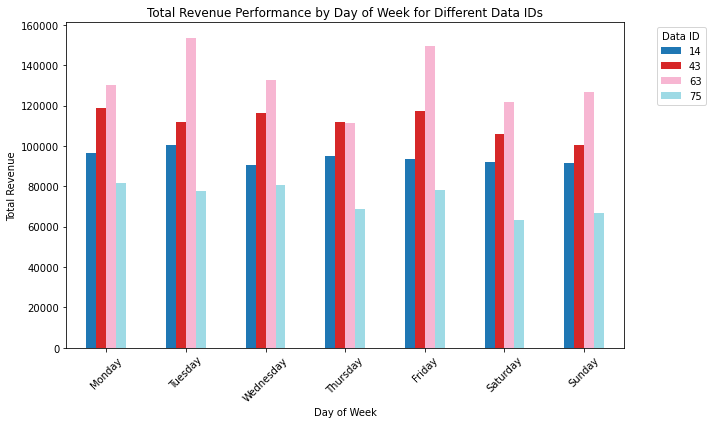

In [38]:
data['Date'] = pd.to_datetime(data['Date'])

#Extract the day of the week from the 'Date' column
data['DayOfWeek'] = data['Date'].dt.day_name()

#Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

revenue_by_day = data.groupby(['DayOfWeek', 'Data ID'])['Total Revenue'].sum().unstack()
revenue_by_day = revenue_by_day.reindex(day_order)

#Plotting
fig, ax = plt.subplots(figsize = (10, 6))
revenue_by_day.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = ax)
plt.title('Total Revenue Performance by Day of Week for Different Data IDs')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title = 'Data ID', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

**Based on the histogram plot:**

* For Data ID 43, Wednesday has the highest total revenue, followed by Monday.
* For Data ID 63, Tuesday has the highest total revenue, followed by Wednesday.
* For Data ID 14, Tuesday has the highest total revenue, followed by Friday.
* For Data ID 75, Wednesday has the highest total revenue, followed by Friday.

**Overall, it seems that midweek days (Tuesday, Wednesday, and Thursday) tend to have higher total revenue across all Data IDs, with some variations depending on the specific Data ID. This suggests that there may be certain patterns or trends in revenue generation based on the day of the week and the audience type.**

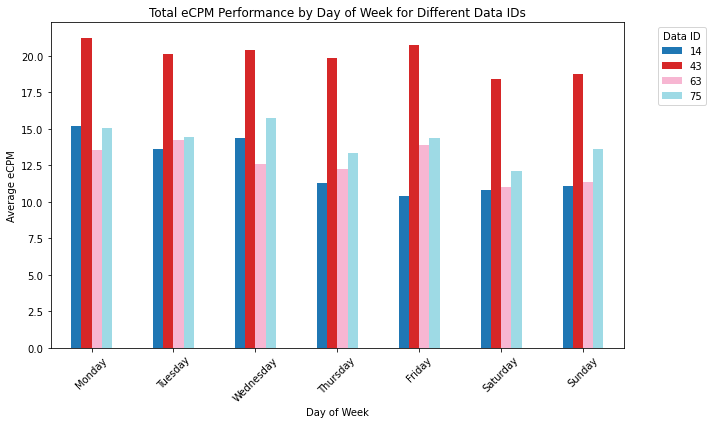

In [39]:
#Group the data by 'Data ID' and day of the week, and calculate eCPM
revenue_by_day = data.groupby(['DayOfWeek','Data ID'])['Last eCPM'].mean().unstack()
revenue_by_day = revenue_by_day.reindex(day_order)

#Plotting
fig, ax = plt.subplots(figsize = (10, 6))
revenue_by_day.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = ax)
plt.title('Total eCPM Performance by Day of Week for Different Data IDs')
plt.xlabel('Day of Week')
plt.ylabel('Average eCPM')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title = 'Data ID', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

**Based on the histogram plot:**

* For Data ID 43, Monday has the highest average revenue per delivered, followed by Wednesday.
* For Data ID 63, Tuesday has the highest average revenue per delivered, followed by Monday.
* For Data ID 14, Wednesday has the highest average revenue per delivered, followed by Tuesday.
* For Data ID 75, Tuesday has the highest average revenue per delivered, followed by Friday.

**Overall, it seems that Monday and Tuesday are the most lucrative days for revenue generation across different Data IDs, with some variations depending on the specific Data ID.**

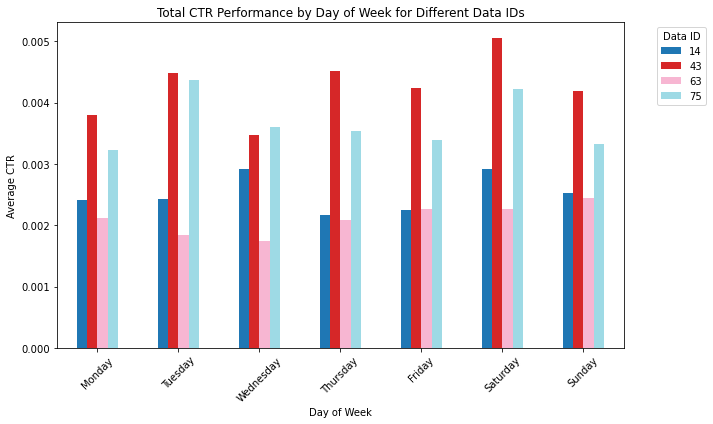

In [40]:
#Group the data by 'Data ID' and day of the week, and calculate total CTR
revenue_by_day = data.groupby(['DayOfWeek','Data ID'])['CTR'].mean().unstack()
revenue_by_day = revenue_by_day.reindex(day_order)

#Plotting
fig, ax = plt.subplots(figsize = (10, 6))
revenue_by_day.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = ax)
plt.title('Total CTR Performance by Day of Week for Different Data IDs')
plt.xlabel('Day of Week')
plt.ylabel('Average CTR')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title = 'Data ID', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

**Based on the histogram plot:**

* For Data ID 43, Saturday has the highest average revenue per delivered, followed by Tuesday.
* For Data ID 63, Monday has the highest average revenue per delivered, followed by Friday.
* For Data ID 14, Wednesday has the highest average revenue per delivered, followed by Tuesday.
* For Data ID 75, Tuesday has the highest average revenue per delivered, followed by Saturday.

**Overall, it appears that weekends (Saturday and Sunday) tend to have higher average revenue per delivered for most Data IDs. However, there are some variations depending on the specific Data ID and day of the week.**

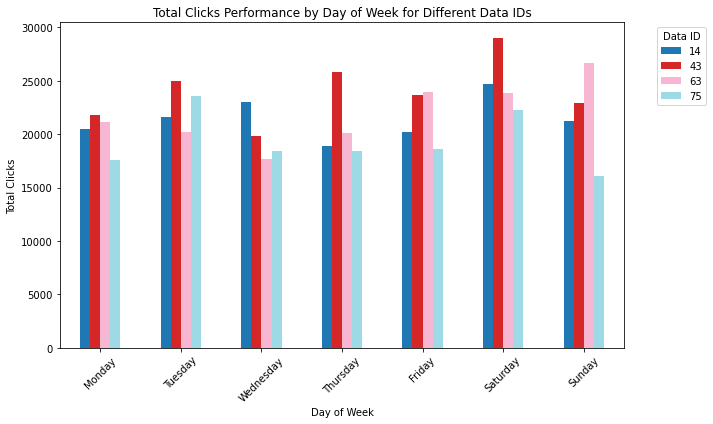

In [41]:
#Group the data by 'Data ID' and day of the week, and calculate total clicks
revenue_by_day = data.groupby(['DayOfWeek','Data ID'])['Clicks'].sum().unstack()
revenue_by_day = revenue_by_day.reindex(day_order)

#Plotting
fig, ax = plt.subplots(figsize = (10, 6))
revenue_by_day.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = ax)
plt.title('Total Clicks Performance by Day of Week for Different Data IDs')
plt.xlabel('Day of Week')
plt.ylabel('Total Clicks')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title = 'Data ID', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

**Based on the histogram plot:**

* Data ID 43 generates the highest total revenue on Saturday, followed by Tuesday.
* Data ID 63 generates the highest total revenue on Sunday, followed by Friday.
* Data ID 14 generates the highest total revenue on Saturday, followed by Wednesday.
* Data ID 75 generates the highest total revenue on Tuesday, followed by Friday.

**Overall, it appears that weekends (Saturday and Sunday) tend to have higher total revenue across different Data IDs.**
****
### Conclusion
Based on the analysis conducted on the dataset, the primary metric considered was Total Revenue, calculated as Revenue multiplied by Drop Number. Initially, based on this metric, the best Offer ID is $61$, as it generated the highest total revenue. One notable finding is that Offer ID $685$ consistently generated the highest revenue in November and December $2022$. However, it is worth noting that there were no records available for January $2023$. Nonetheless, based on the observed trend, Offer ID $685$ shows promise as a potential top performer.

Additionally, when examining different Offer IDs for various Data IDs, Offer ID $444$ is identified as the best offer ID based on the same metric.

Furthermore, while striving to discover the positive relationship between revenue and clicks, which differs among Data IDs, we should establish different marketing strategies or adjustments to optimize their effectiveness with the various offer IDs.

Moreover, in the third part of the analysis, I aimed to identify the offer types generating the highest revenue across different audience types and recommend effective promotional tactics for each category. During this part, there are so many 

Lastly, I provided insights into the relationship between different metrics, such as total revenue, eCPM, CTR, and total clicks, with the day of the week and audience type. Understanding these patterns can inform strategic decision-making in digital marketing campaigns to maximize revenue generation and optimize performance.